## Working with rHEALpix in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/04_rhealpix.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/04_rhealpix.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/04_rhealpix.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/04_rhealpix.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [16]:
# %pip install vgrid --upgrade

### latlon2rhealpix

In [28]:
from vgrid.conversion.latlon2dggs import latlon2rhealpix

lat = 10.775276
lon = 106.706797
res = 12
rhealpix_id = latlon2rhealpix(lat, lon, res)
rhealpix_id

'R312603625535'

### rHEALPix to Shapely Polygon

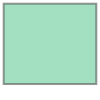

In [18]:
from vgrid.conversion.dggs2geo.rhealpix2geo import rhealpix2geo

rhealpix_geo = rhealpix2geo(rhealpix_id)
rhealpix_geo

### rHEALPix to GeoJSON        

In [19]:
from vgrid.conversion.dggs2geo.rhealpix2geo import rhealpix2geojson

rhealpix_geojson = rhealpix2geojson(rhealpix_id)
rhealpix_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70663347389456, 10.77533208524741),
      (106.70680282477264, 10.77533208524741),
      (106.70680282477264, 10.7751851674467),
      (106.70663347389456, 10.7751851674467),
      (106.70663347389456, 10.77533208524741)),)},
   'properties': {'rhealpix': 'R312603625535',
    'resolution': 12,
    'center_lat': 10.7752586,
    'center_lon': 106.7067181,
    'avg_edge_len': 17.387,
    'cell_area': 300.999,
    'cell_perimeter': 69.546}}]}

### Vector to rHEALPix

Processing features: 100%|██████████| 4/4 [00:00<00:00, 18.50it/s]


<Axes: >

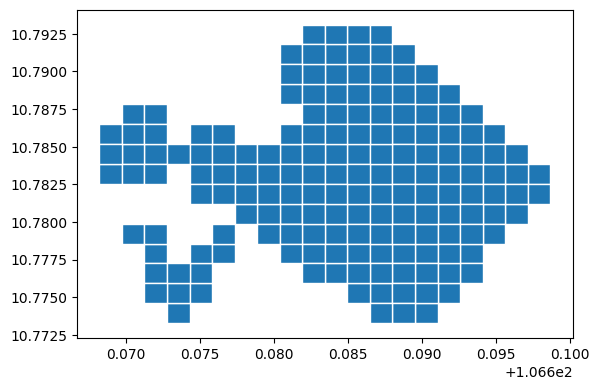

In [20]:
from vgrid.conversion.vector2dggs.vector2rhealpix import vector2rhealpix

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_rhealpix = vector2rhealpix(file_path, resolution=10, compact=False, 
                                    predicate = "intersects",output_format="gpd")
# Visualize the output 
vector_to_rhealpix.plot(edgecolor="white")

### rHEALPix Compact

<Axes: >

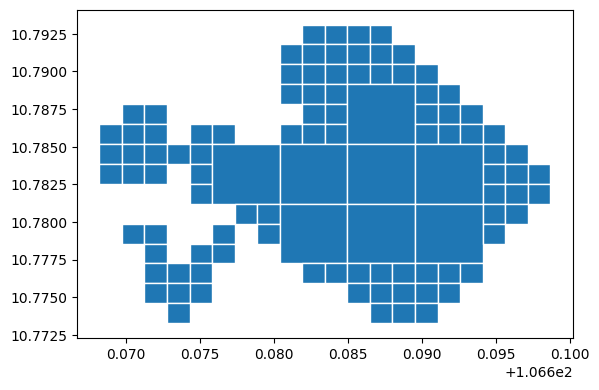

In [21]:
from vgrid.conversion.dggscompact.rhealpixcompact import rhealpixcompact

rhealpix_compacted = rhealpixcompact(
    vector_to_rhealpix, rhealpix_id="rhealpix", output_format="gpd")
rhealpix_compacted.plot(edgecolor="white")



### rHEALPix Expand

<Axes: >

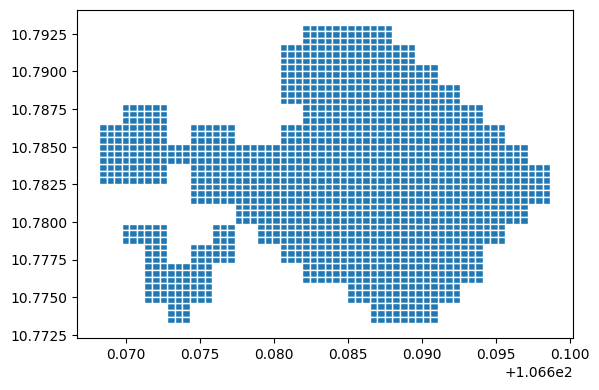

In [22]:
from vgrid.conversion.dggscompact.rhealpixcompact import rhealpixexpand

rhealpix_expanded = rhealpixexpand(
    vector_to_rhealpix, resolution=11, output_format="gpd"
)
rhealpix_expanded.plot(edgecolor="white")


### rHEALPix Binning

Generating rHEALPix DGGS: 100%|██████████| 836/836 [00:00<00:00, 2493.70 cells/s]


<Axes: >

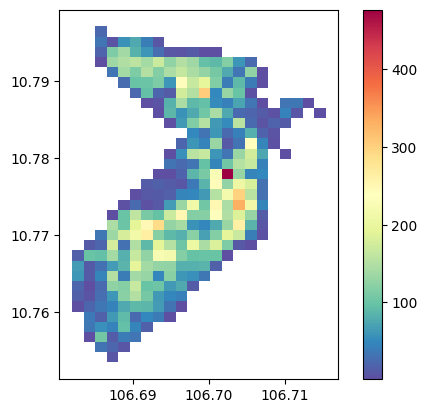

In [29]:
from vgrid.binning.rhealpixbin import rhealpixbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
rhealpix_bin = rhealpixbin(file_path, resolution=10, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
rhealpix_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)   

### Raster to rHEALPix

In [24]:
# %pip install folium

In [25]:
from vgrid.conversion.raster2dggs.raster2rhealpix import raster2rhealpix
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_rhealpix =  raster2rhealpix(raster_file,output_format="gpd")
# Visualize the output 
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

rhealpix_layer = folium.GeoJson(
    raster_to_rhealpix,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["rhealpix", "resolution", "band_1", "band_2", "band_3", "cell_area"],
        aliases=["rHEALPix ID", "Resolution", "Band 1", "Band 2", "Band 3", "Area (m²)"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(rhealpix_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest rhealpix resolution determined: 15


Converting raster to rHEALPix: 100%|██████████| 7416/7416 [00:02<00:00, 2890.30 cells/s]


### rHEALPix Generator

Generating rHEALPix DGGS: 100%|██████████| 54/54 [00:00<00:00, 1810.82 cells/s]


<Axes: >

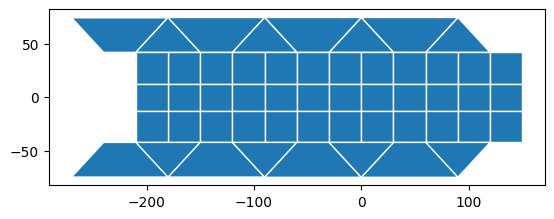

In [26]:
from vgrid.generator.rhealpixgrid import rhealpixgrid

rhealpix_grid = rhealpixgrid(resolution=1,output_format="gpd")
# rhealpix_grid = rhealpixgrid(resolution=10,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
rhealpix_grid.plot(edgecolor="white")

### rHEALPix Inspect

In [30]:
from vgrid.stats.rhealpixstats import rhealpixinspect
resolution = 4
rhealpix_inspect = rhealpixinspect(resolution)
rhealpix_inspect.head()

Generating rHEALPix DGGS: 100%|██████████| 39366/39366 [00:15<00:00, 2556.01 cells/s]


rhealpix  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0    N0000           4   42.358775   90.000000    172981.661  1.292597e+10   
1    N0001           4   42.571866   88.884142    129535.797  1.295728e+10   
2    N0002           4   42.571866   87.758908    128917.630  1.295731e+10   
3    N0003           4   42.571866   91.115858    129535.797  1.295728e+10   
4    N0004           4   43.619451   90.000000    173055.827  1.292701e+10   

   cell_perimeter                                           geometry  crossed  \
0      518944.984  POLYGON ((90 43.20062, 91.11111 41.93785, 90 4...    False   
1      518143.187  POLYGON ((88.86076 43.20062, 90 43.20062, 88.8...    False   
2      515670.521  POLYGON ((87.72152 43.20062, 88.86076 43.20062...    False   
3      518143.187  POLYGON ((90 43.20062, 91.13924 43.20062, 92.2...    False   
4      519167.480  POLYGON ((90 44.45712, 91.13924 43.20062, 90 4...    False   

   norm_area       ipq       zsc  
0   0.997604  0.603157  0.776622  
1   1.000021  0.606491  0.778765  
2   1.000024  0.612323  0.782501  
3   1.000021  0.606491  0.778765  
4   0.997685  0.602689  0.776320

### Distribution of rHEALPix Area Distortions

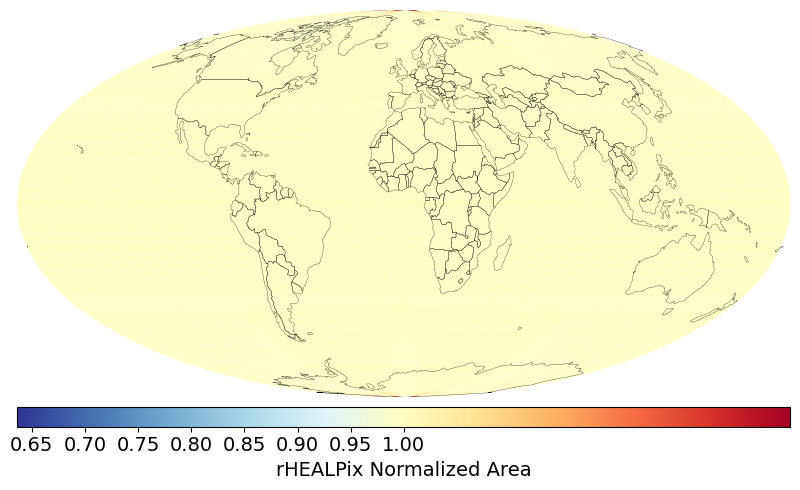

In [31]:
from vgrid.stats.rhealpixstats import rhealpix_norm_area
rhealpix_norm_area(rhealpix_inspect)

### Distribution of rHEALPix IPQ Compactness

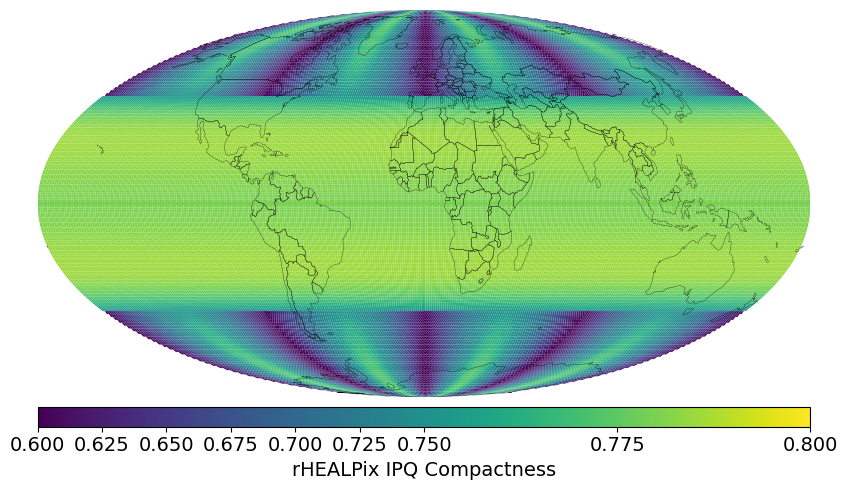

In [32]:
from vgrid.stats.rhealpixstats import rhealpix_compactness
rhealpix_compactness(rhealpix_inspect)

### rHEALPix Statistics

In [1]:
from vgrid.stats.rhealpixstats import rhealpixstats
rhealpixstats('km')       

resolution   number_of_cells  avg_edge_len_km  avg_cell_area_km2
0            0                 6      9220.137605       8.501094e+07
1            1                54      3073.379202       9.445660e+06
2            2               486      1024.459734       1.049518e+06
3            3              4374       341.486578       1.166131e+05
4            4             39366       113.828859       1.295701e+04
5            5            354294        37.942953       1.439668e+03
6            6           3188646        12.647651       1.599631e+02
7            7          28697814         4.215884       1.777368e+01
8            8         258280326         1.405295       1.974853e+00
9            9        2324522934         0.468432       2.194281e-01
10          10       20920706406         0.156144       2.438090e-02
11          11      188286357654         0.052048       2.708989e-03
12          12     1694577218886         0.017349       3.009988e-04
13          13    15251194969974         0.005783       3.344431e-05
14          14   137260754729766         0.001928       3.716034e-06
15          15  1235346792567894         0.000643       4.128927e-07